## SBU Kinect Data Analysis

In [1]:
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import glob
import os

%matplotlib inline

### Classes

In [2]:
idx_to_label = {
    1 : 'approaching',
    2 : 'departing',
    3 : 'kicking',
    4 : 'pushing',
    5 : 'handshaking',
    6 : 'hugging',
    7 : 'exchanging',
    8 : 'punching',
}

### Data Statistics

In [3]:
videos_per_class = defaultdict(lambda:0)
frames_per_video = OrderedDict()

dataset_dir = "./sbu_dataset"

video_no = 1 # counter to keep track of number of videos
for i in range(1,22): 
    set_no = str(i)
    path_to_set = os.path.join(dataset_dir,set_no)
    part_no = os.listdir(path_to_set)[0] # participant no.
    path_to_part = os.path.join(path_to_set,part_no)
    cats = sorted(os.listdir(path_to_part))[1::]
    
    for cat in cats:
        label = int(cat)
        path_to_cat = os.path.join(path_to_part,cat) # path to category(1-8)
        runs = sorted(os.listdir(path_to_cat)) 
        if runs[0] == '.DS_Store':
            runs = runs[1::]
        
        videos_per_class[label] += len(runs)  
        
        for run in runs:
            run_path = os.path.join(path_to_cat, run)
            num_frames = len(glob.glob(f'{run_path}/rgb*'))
            
            frames_per_video[video_no] = num_frames
            video_no += 1

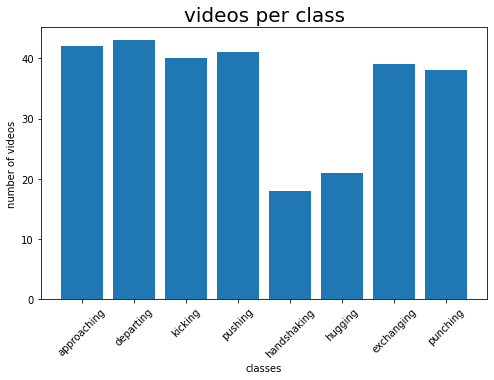

Minimum number of videos for a class : 18
Maximum number of videos for a class : 43
Total number of videos : 282


In [9]:
plt.figure(figsize=(8,5))
plt.title('videos per class', fontdict = {'fontsize':20})
plt.xticks(rotation=45)
plt.xlabel('classes')
plt.ylabel('number of videos')
plt.bar(x = [idx_to_label[idx] for idx in list(videos_per_class.keys())], height = videos_per_class.values())
plt.show()

unique_videos = np.unique(list(videos_per_class.values()))
print(f'Minimum number of videos for a class : {unique_videos[0]}')
print(f'Maximum number of videos for a class : {unique_videos[-1]}')
print(f'Total number of videos : {np.sum(list(videos_per_class.values()))}')

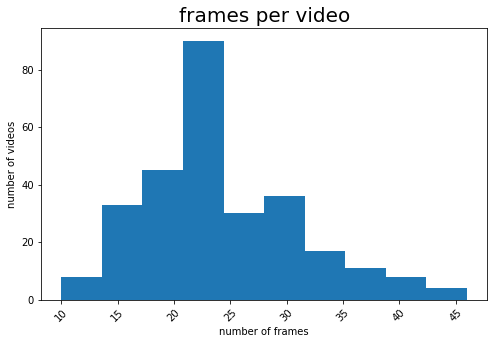

Minimum number of frames : 10
Maximum number of frames : 46


In [5]:
plt.figure(figsize=(8,5))
plt.title('frames per video', fontdict = {'fontsize':20})
plt.xticks(rotation=45)
plt.xlabel('number of frames')
plt.ylabel('number of videos')
plt.hist(x = list(frames_per_video.values()), bins=10)
plt.show()

unique_frames = np.unique(list(frames_per_video.values()))
print(f'Minimum number of frames : {unique_frames[0]}')
print(f'Maximum number of frames : {unique_frames[-1]}')

### Visualize First 15 Frames of All Actions

1) Action : approaching


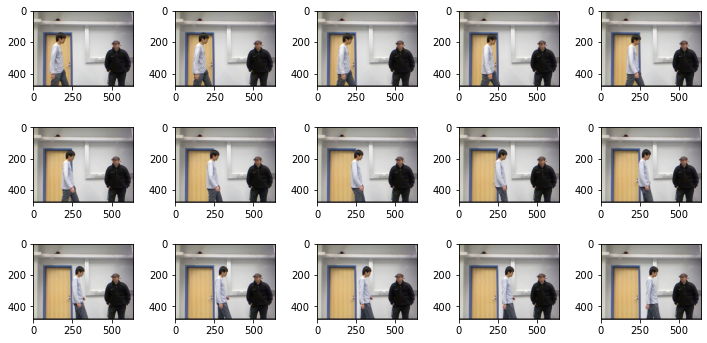

2) Action : departing


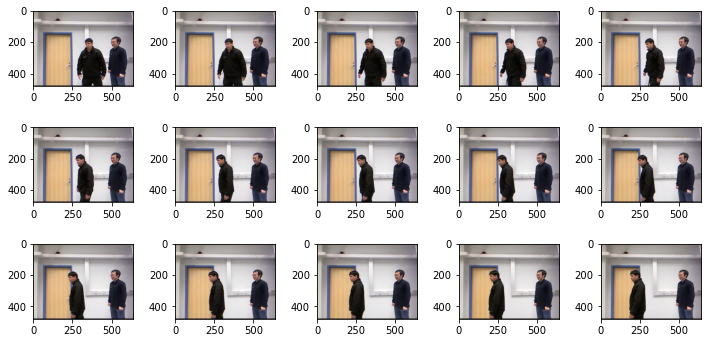

3) Action : kicking


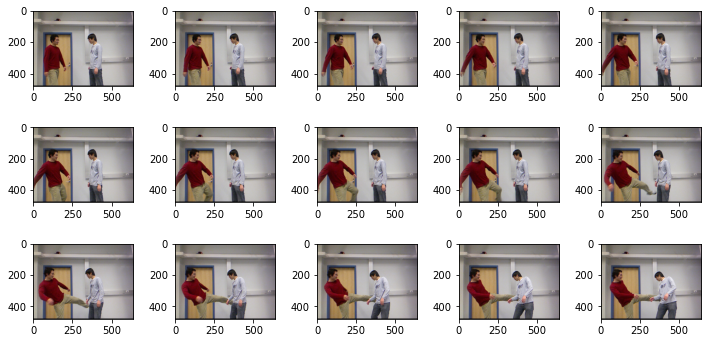

4) Action : pushing


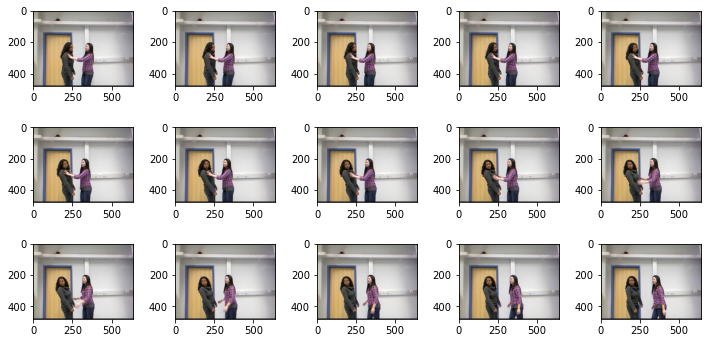

5) Action : handshaking


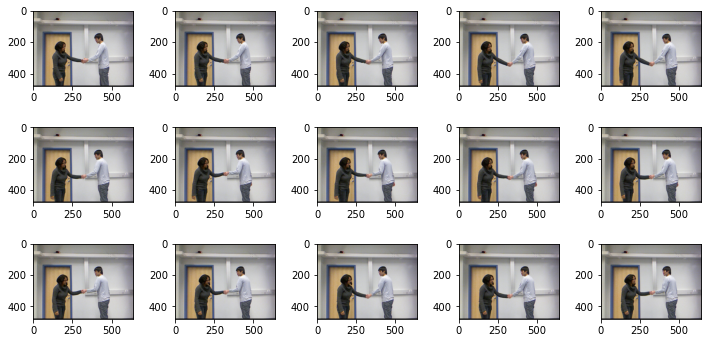

6) Action : hugging


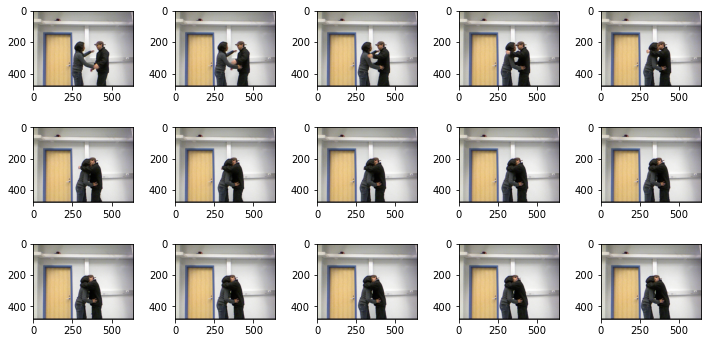

7) Action : exchanging


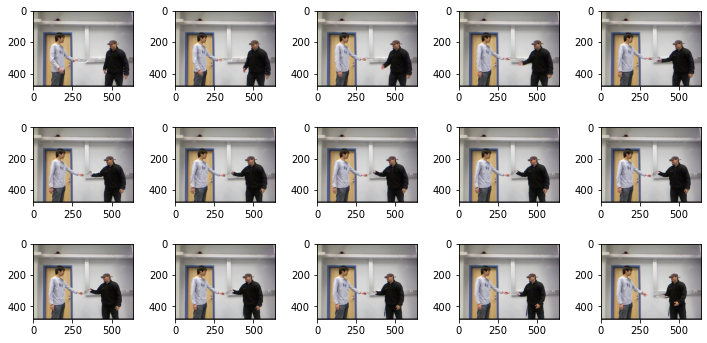

8) Action : punching


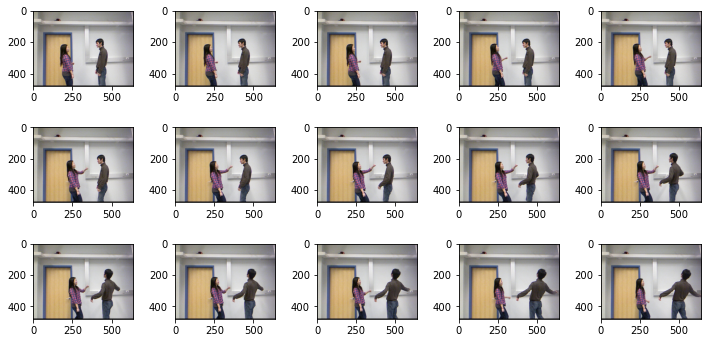

In [6]:
target="./sbu_dataset"


'''set (1-21) - action (1-8) - participant_run (1/2/3)'''
# frames_code = '1-8-1' 


max_frames_to_plot = 15
def plot_frames(frames_code):
    set_no, action, run = frames_code.strip().split('-')
    
    run='%03d' % int(run)
    action = '%02d' % int(action)
    
    set_path = os.path.join(target,set_no)
    stu_names = os.listdir(set_path)[0]
    frames_path = os.path.join(set_path,stu_names,action,run)
    
    rgb_images = sorted(glob.glob(f'{frames_path}/rgb*'))
    
    num_frames = min(len(rgb_images),max_frames_to_plot)
#     print(f'number of frames : {num_frames}')
    
    fig,axs = plt.subplots(nrows=(num_frames-1)//5+1, ncols=5, figsize=(10,5))
    fig.tight_layout()
    
    axs = axs.flatten()
    for ax in axs[num_frames:]:
        ax.set_visible(False)
    
    for i,ax in enumerate(axs):
        img = imread(rgb_images[i])
        ax.imshow(img)
        
    plt.show()
        
np.random.seed(42)
for i in range(1,9):
    print(f'{i}) Action : {idx_to_label[i]}')
    
    set_no = np.random.randint(low = 1, high = 22)
    frames_code = f'{set_no}-{i}-1'
    plot_frames(frames_code)
            

### Pose Information

 unique keypoints in this frame [13]


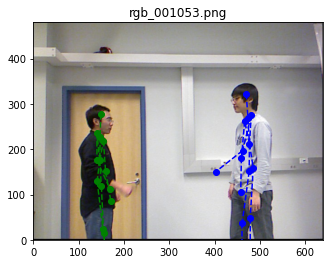

 unique keypoints in this frame [13]


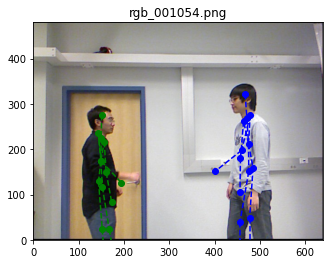

 unique keypoints in this frame [13]


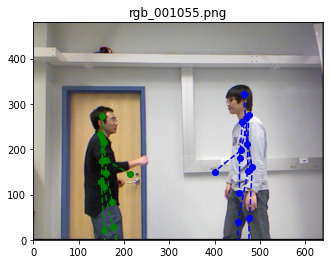

 unique keypoints in this frame [13]


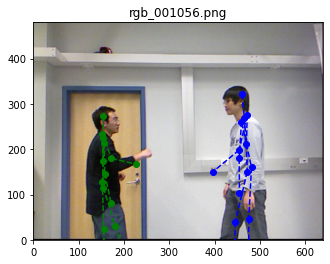

 unique keypoints in this frame [13]


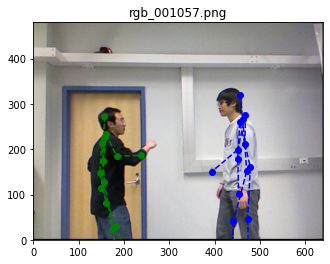

 unique keypoints in this frame [13]


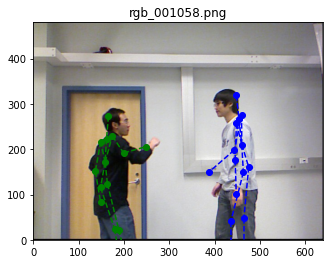

 unique keypoints in this frame [13]


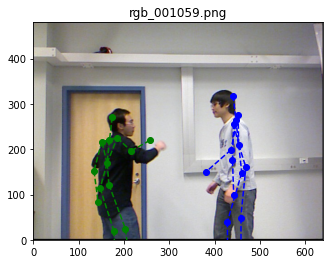

 unique keypoints in this frame [13]


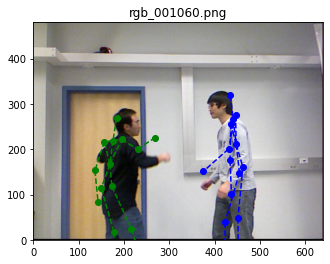

 unique keypoints in this frame [13]


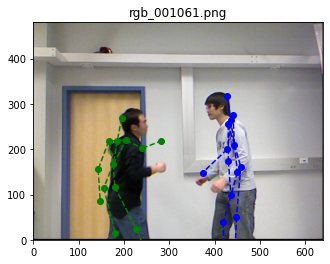

 unique keypoints in this frame [13]


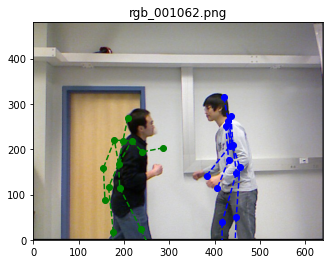

 unique keypoints in this frame [13]


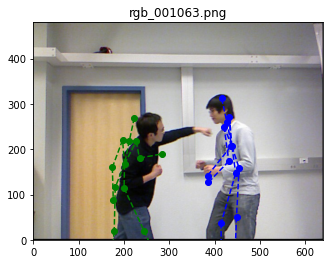

 unique keypoints in this frame [13]


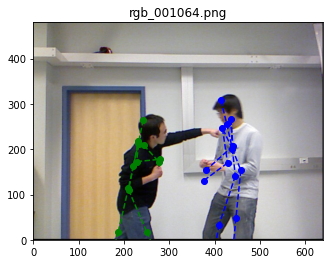

 unique keypoints in this frame [13]


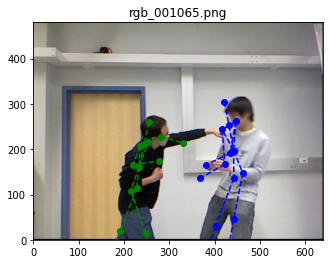

 unique keypoints in this frame [13]


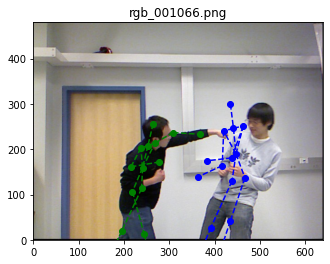

 unique keypoints in this frame [13]


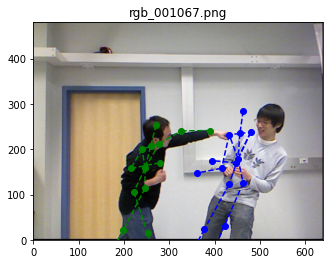

 unique keypoints in this frame [13]


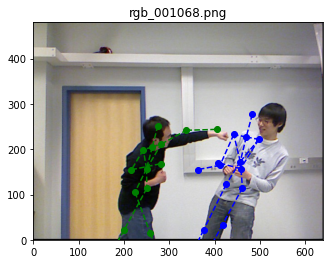

 unique keypoints in this frame [13]


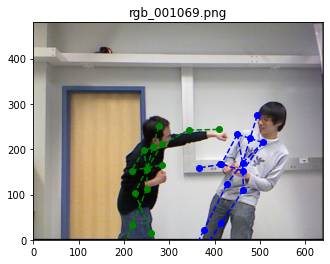

 unique keypoints in this frame [13]


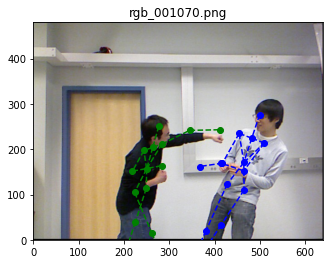

 unique keypoints in this frame [13]


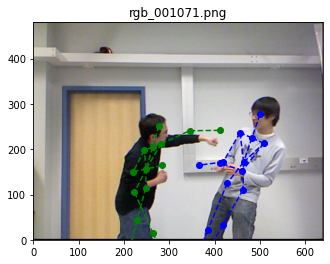

 unique keypoints in this frame [13]


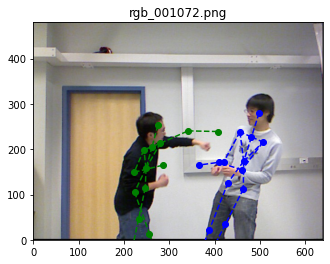

 unique keypoints in this frame [13]


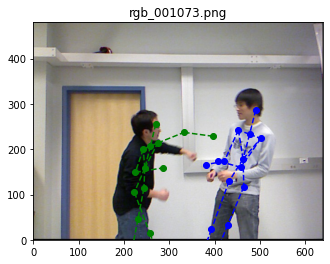

 unique keypoints in this frame [13]


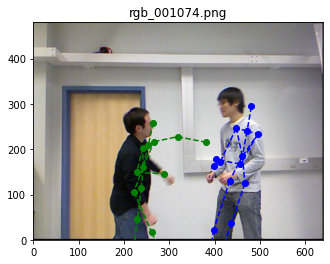

 unique keypoints in this frame [13]


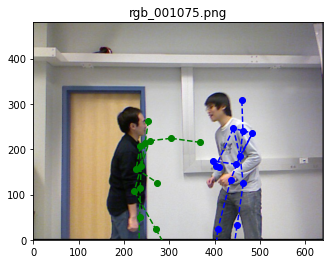

 unique keypoints in this frame [13 14]


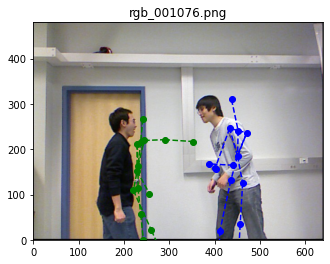

<Figure size 432x288 with 0 Axes>

In [3]:
#path to txt_file that you want to display
# took help from https://github.com/xrenaa/SBU_Kinect_dataset_process/blob/master/download.ipynb
path = '/usr/local/data02/dpdataset/sbu/s01s02/08/001/skeleton_pos.txt'

with open(path) as f:
    data = f.readlines()


number_visible_points = []


start = (len(data) - 10) // 2
end = start + 10

for row in data[start:end]:
    posture = row

    posture_data = [x.strip() for x in posture.split(',')]

    joint_info = {}
    for i, n in enumerate(range(1, len(posture_data), 3)):

        x = 640 - float(posture_data[n])*640
        y = 480 - (float(posture_data[n+1])/1)*480
        z = posture_data[n+2]

        joint_info[i+1] = [x, y, z]

    person_1 = {k:joint_info[k] for k in range(1,16,1)}
    #print(person_1)
    person_2 = {k-15:joint_info[k] for k in range(16,31,1)}
    # print(person_1)

    count1 = 15
    for i, (x,y,z) in list(person_1.items()):
        if x<0 or x>640 or y<0 or y>480:
                count1 -= 1

    count2 = 15
    for i, (x,y,z) in list(person_2.items()):
        if x<0 or x>640 or y<0 or y>480:
                count2 -= 1

    number_visible_points.extend([count1, count2])
    print(f' unique keypoints in this frame {np.unique([count1, count2])}')


    joint_details = {1 : 'HEAD',
                     2 : 'NECK',
                     3 : 'TORSO',
                     4 : 'LEFT_SHOULDER',
                     5 : 'LEFT_ELBOW',
                     6 : 'LEFT_HAND',
                     7 : 'RIGHT_SHOULDER',
                     8 : 'RIGHT_ELBOW',
                     9 : 'RIGHT_HAND',
                     10 : 'LEFT_HIP',
                     11 : 'LEFT_KNEE',
                     12 : 'LEFT_FOOT',
                     13 : 'RIGHT_HIP',
                     14 : 'RIGHT_KNEE',
                     15 : 'RIGHT_FOOT'}
    connect_map = [[1,2,2,2,3,3,3,3,4,5,7,8,10,11,13,14],[2,3,4,7,4,7,10,13,5,6,8,9,11,12,14,15]]



    for key, value in person_1.items():
        plt.plot(value[0], value[1], 'bo')
#         plt.annotate(key, (value[0], value[1]))
    for m, n in zip(connect_map[0], connect_map[1]):
        plt.plot((person_1[m][0], person_1[n][0]), (person_1[m][1], person_1[n][1]), 'b--')

    for key, value in person_2.items():
        plt.plot(value[0], value[1], 'go')
#         plt.annotate(key, (value[0], value[1]))
    for m, n in zip(connect_map[0], connect_map[1]):
        plt.plot((person_2[m][0], person_2[n][0]), (person_2[m][1], person_2[n][1]), 'g--')

    plt.xlim(0, 640)
    plt.ylim(0, 480)

    img_no = ""    
    for i in row:
        if not i.isdigit():
            break
        img_no += i

    img_no = 'rgb_%06d.png' % int(img_no)
    img_path = os.path.join(os.path.split(path)[0], img_no)
    img = np.array(plt.imread(img_path))
    img = img[::-1,:,:]
    plt.imshow(img)
    plt.title(img_no)
    plt.pause(0.1)
    plt.clf()

### Mean and Std-dev of SBU Dataset

In [4]:
# number of channels of the dataset image, 3 for color jpg, 1 for grayscale img
# you need to change it to reflect your dataset
from os import listdir
from os.path import join, isdir
from glob import glob
import cv2
import timeit

from tqdm import tqdm
import sys
sys.path.insert(0,'..')
from datasets.sbu.train_test_split import train_sets, test_sets


CHANNEL_NUM = 3


def cal_dir_stat(train_set):

    pixel_num = 0 # store all pixel number in the dataset
    channel_sum = np.zeros(CHANNEL_NUM)
    channel_sum_squared = np.zeros(CHANNEL_NUM)

    
    for part_path in tqdm(train_set): 
        cats = sorted([s.decode("utf-8") for s in os.listdir(part_path)])[1:]      
        for cat in cats:
            cat_path = os.path.join(part_path,cat) # path to category(1-8)
            runs = sorted(os.listdir(cat_path)) 
            if runs[0] == '.DS_Store':
                runs = runs[1::]        
            for run in runs:
                run_path = os.path.join(cat_path, run)
                
                im_pths = glob(f'{run_path}/rgb*')
                for path in im_pths:
                    im = cv2.imread(path) # image in M*N*CHANNEL_NUM shape, channel in BGR order
                    im = im/255.0
                    pixel_num += (im.size/CHANNEL_NUM)
                    channel_sum += np.sum(im, axis=(0, 1))
                    channel_sum_squared += np.sum(np.square(im), axis=(0, 1))

    bgr_mean = channel_sum / pixel_num
    bgr_std = np.sqrt(channel_sum_squared / pixel_num - np.square(bgr_mean))
    
    # change the format from bgr to rgb
    rgb_mean = list(bgr_mean)[::-1]
    rgb_std = list(bgr_std)[::-1]
    
    return rgb_mean, rgb_std


train_sets = train_sets[0]

start = timeit.default_timer()
mean, std = cal_dir_stat(train_sets)
end = timeit.default_timer()
print("elapsed time: {}".format(end-start))
print("mean:{}\nstd:{}".format(mean, std))

elapsed time: 105.52661941573024
mean:[0.6113564236886354, 0.5845295735660462, 0.5665304329204963]
std:[0.2195927053676789, 0.216422641328269, 0.21303446378766955]
